# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import warnings
import string
import nltk
%matplotlib inline
warnings.filterwarnings('ignore')


# Loading the Dataset

In [2]:
df = pd.read_csv("tweets_data.csv")

In [3]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
df.shape

(31962, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


# Data Preprocessing

In [6]:
# removing pattern in the tweets
def remove_pattern(input_text, pattern):
    rmv  = re.findall(pattern, input_text)
    for word in rmv:
        input_text = re.sub(word, "", input_text)
    return input_text

In [7]:
# removing twitter handles from tweets (@username)
df['tweet'] = np.vectorize(remove_pattern)(df['tweet'], '@[\w]*')

In [8]:
df.head()

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [9]:
# Removing URLs
def cleaning_URLs(text):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',text)
df['tweet'] = df['tweet'].apply(lambda x: cleaning_URLs(x))

In [10]:
# removing special characters, numbers & punctuations
df['tweet'] = df['tweet'].str.replace("[^a-zA-Z#]", " ")

In [11]:
# removing repeating char
def remove_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df['tweet'] = df['tweet'].apply(lambda x: remove_repeating_char(x))

In [12]:
df.tail()

,id,label,tweet
31957,31958,0,ate isz that youuu ...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,#sikh #temple vandalised in in #calgary #wso...
31961,31962,0,thank you for you follow


In [13]:
# Cleaning Stopwords and Shortwords from the tweets
from nltk.corpus import stopwords
stop = stopwords.words('english')

def cleaning_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop])

def cleaning_shortwords(text):
    return " ".join([word for word in text.split() if len(word)>2])

In [14]:
df['tweet'] = df['tweet'].apply(lambda tweets: cleaning_stopwords(tweets))

df['tweet'] = df['tweet'].apply(lambda tweets: cleaning_shortwords(tweets))
df.head()

,id,label,tweet
0,1,0,father dysfunctional selfish drags kids dysfun...
1,2,0,thanks #lyft credit use cause offer wheelchair...
2,3,0,bihday majesty
3,4,0,#model love take time
4,5,0,factsguide society #motivation


In [15]:
# individual words are considered as tokens
tokenized_tweet = df['tweet'].apply(lambda x: x.split())
tokenized_tweet

0        [father, dysfunctional, selfish, drags, kids, ...
1        [thanks, #lyft, credit, use, cause, offer, whe...
2                                        [bihday, majesty]
3                               [#model, love, take, time]
4                       [factsguide, society, #motivation]
                               ...                        
31957                                    [ate, isz, youuu]
31958    [see, nina, turner, airwaves, trying, wrap, ma...
31959    [listening, sad, songs, monday, morning, otw, ...
31960    [#sikh, #temple, vandalised, #calgary, #wso, c...
31961                                      [thank, follow]
Name: tweet, Length: 31962, dtype: object

In [16]:
# Implementing Stemming 
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda tweet: [stemmer.stem(word) for word in tweet])
tokenized_tweet.head()

0    [father, dysfunct, selfish, drag, kid, dysfunc...
1    [thank, #lyft, credit, use, caus, offer, wheel...
2                                    [bihday, majesti]
3                           [#model, love, take, time]
4                         [factsguid, societi, #motiv]
Name: tweet, dtype: object

In [17]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['tweet'] = tokenized_tweet
df.head()

,id,label,tweet
0,1,0,father dysfunct selfish drag kid dysfunct #run
1,2,0,thank #lyft credit use caus offer wheelchair v...
2,3,0,bihday majesti
3,4,0,#model love take time
4,5,0,factsguid societi #motiv


# Exploratory Data Analysis

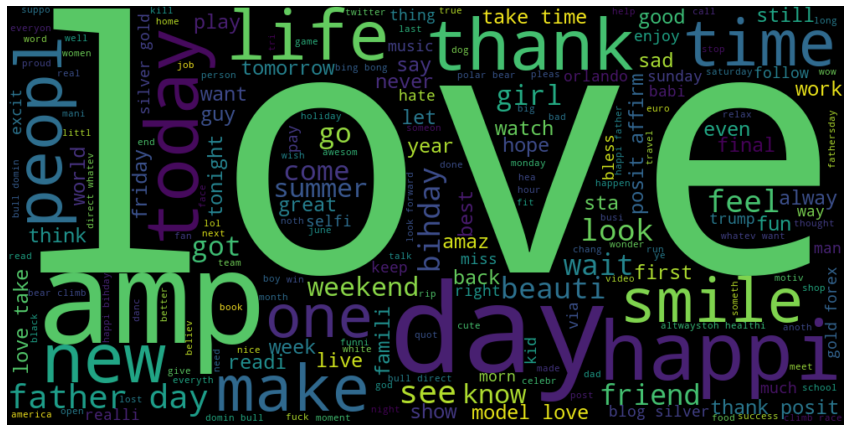

In [18]:
all_words = " ".join([sentence for sentence in df['tweet']]) 

from wordcloud import WordCloud
wordcloud = WordCloud(height= 500, width=1000, random_state=42, max_font_size=1000).generate(all_words)

# plotting figure
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

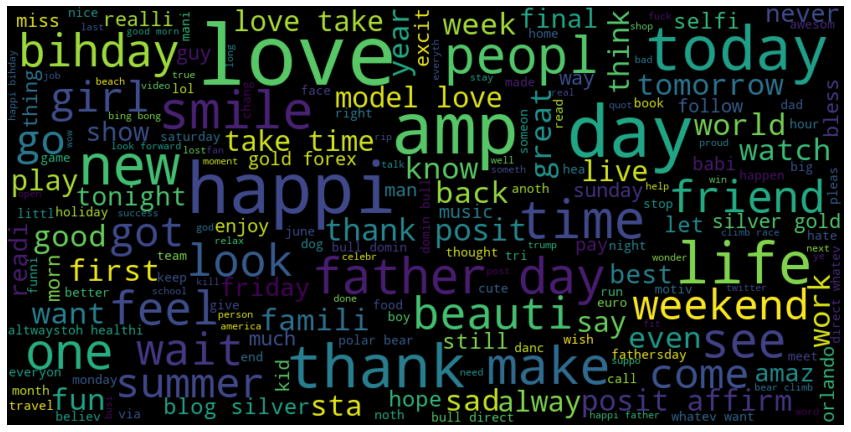

In [19]:
# Visualizing -ve words in tweets
all_words = " ".join([sentence for sentence in df['tweet'][df['label']==0]]) 

from wordcloud import WordCloud
wordcloud = WordCloud(height= 500, width=1000, random_state=42, max_font_size=100).generate(all_words)

# plotting figure
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

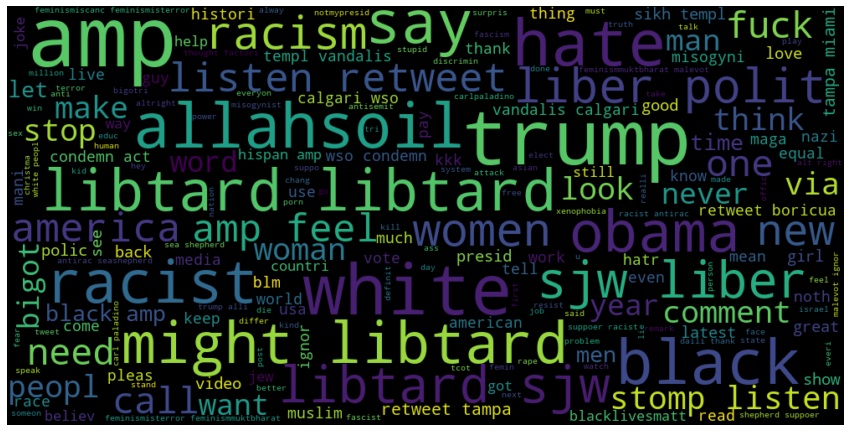

In [20]:
# Visualizing +ve words in tweets
all_words = " ".join([sentence for sentence in df['tweet'][df['label']==1]]) 

from wordcloud import WordCloud
wordcloud = WordCloud(height= 500, width=1000, random_state=42, max_font_size=100).generate(all_words)

# plotting figure
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
# Function to extract hashtags from tweets
def hashtag_extract(tweets):
    hashtags = []
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [22]:
ht_positive = hashtag_extract(df['tweet'][df['label']==0])

ht_negative = hashtag_extract(df['tweet'][df['label']==1])

In [23]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [24]:
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [25]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [26]:
# Visualizing Most used Positive Hashtags in Tweets
freq = nltk.FreqDist(ht_positive)
data = pd.DataFrame({"Hashtag": list(freq.keys()),
                    "Count": list(freq.values())})
data.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


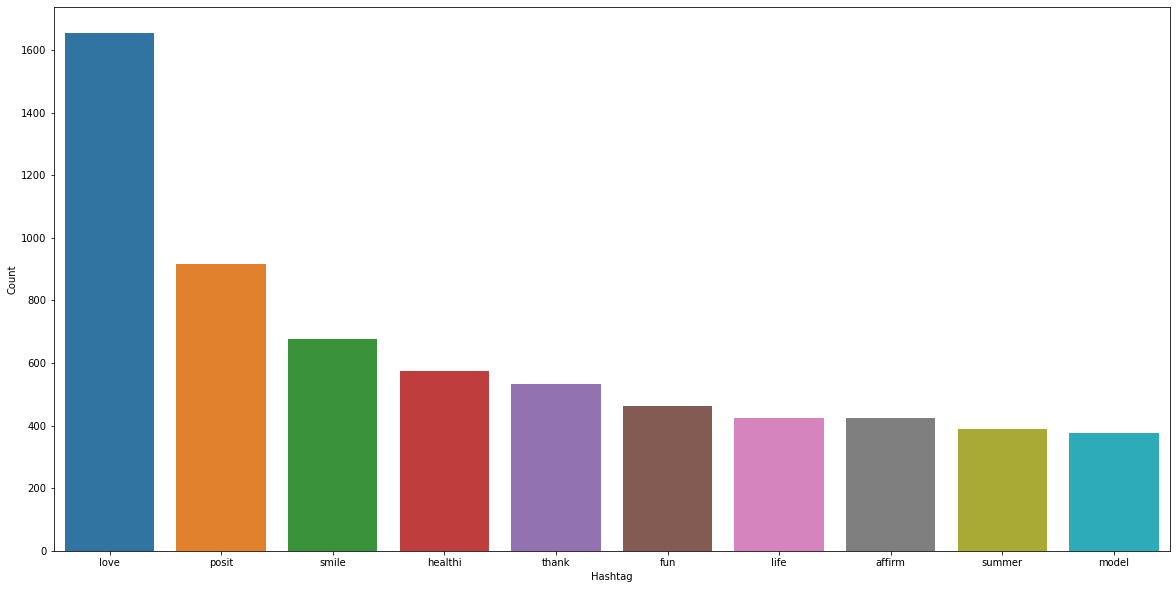

In [27]:
data = data.nlargest(columns="Count", n=10)
plt.figure(figsize=(20,10))
sns.barplot(data=data, x='Hashtag', y='Count')
plt.show()

In [28]:
# Visualizing Most used Negative Hashtags in Tweets
freq2 = nltk.FreqDist(ht_negative)
data2 = pd.DataFrame({"Hashtags": list(freq2.keys()),
                     "Count": list(freq2.values())})
data2.head()

,Hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


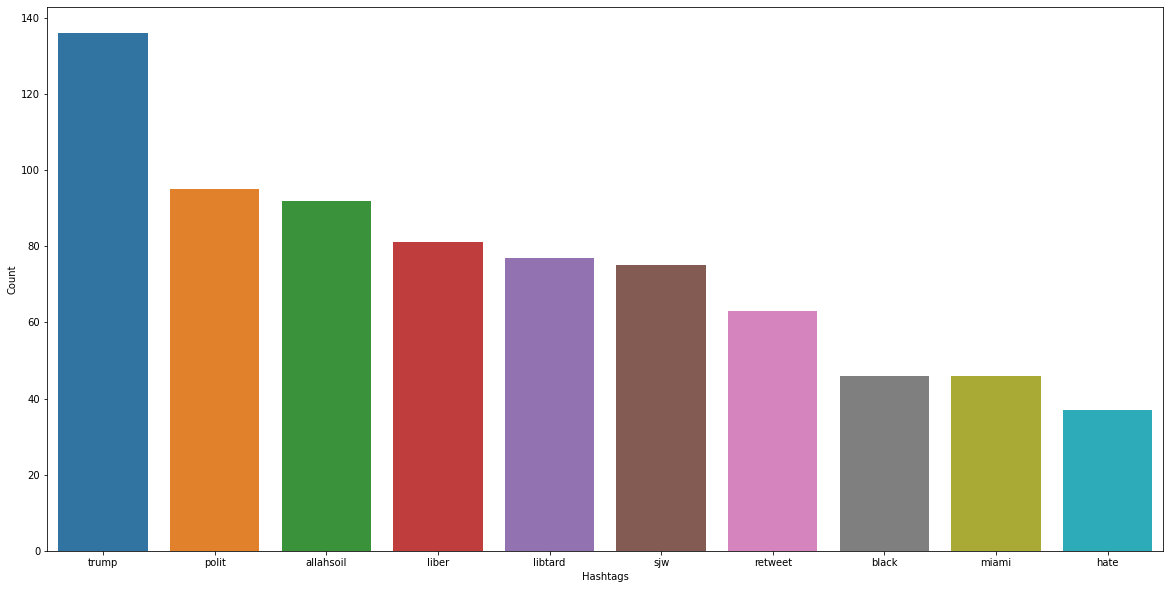

In [29]:
data2 = data2.nlargest(columns="Count", n=10)
plt.figure(figsize=(20,10))
sns.barplot(data=data2, x="Hashtags", y="Count")
plt.show()

# Training and Evaluating Model 

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))

tfidf = tfidf_vectorizer.fit_transform(df['tweet'])

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf, df['label'], random_state=42, test_size=0.2)

In [32]:
# Using Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [33]:
pred = log_reg.predict(X_test)

f1_score(y_test, pred)

0.3093922651933701

In [34]:
accuracy_score(y_test, pred)

0.9413420929141249

In [35]:
# Using Support Vector Machines
from sklearn.svm import LinearSVC
svm = LinearSVC()

svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

f1_score(y_test, svm_pred)

0.6375545851528385

In [36]:
accuracy_score(y_test, svm_pred)*100

96.10511496949789

In [37]:
print(classification_report(y_test, svm_pred))
print(confusion_matrix(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5937
           1       0.95      0.48      0.64       456

    accuracy                           0.96      6393
   macro avg       0.95      0.74      0.81      6393
weighted avg       0.96      0.96      0.96      6393

[[5925   12]
 [ 237  219]]


Hence, Support Vector Machines provided the better prediction than Logistic Regression which we've calculated in terms of F1 score and accuracy score.